**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [112]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [113]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [114]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [115]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [116]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), array([ 2848,  7216,  5431,  6703,  9485, 10861,  7536,  4368,  5727,
        4835], dtype=int32)) [1 1 1 1 1 1 1 1 1 1]


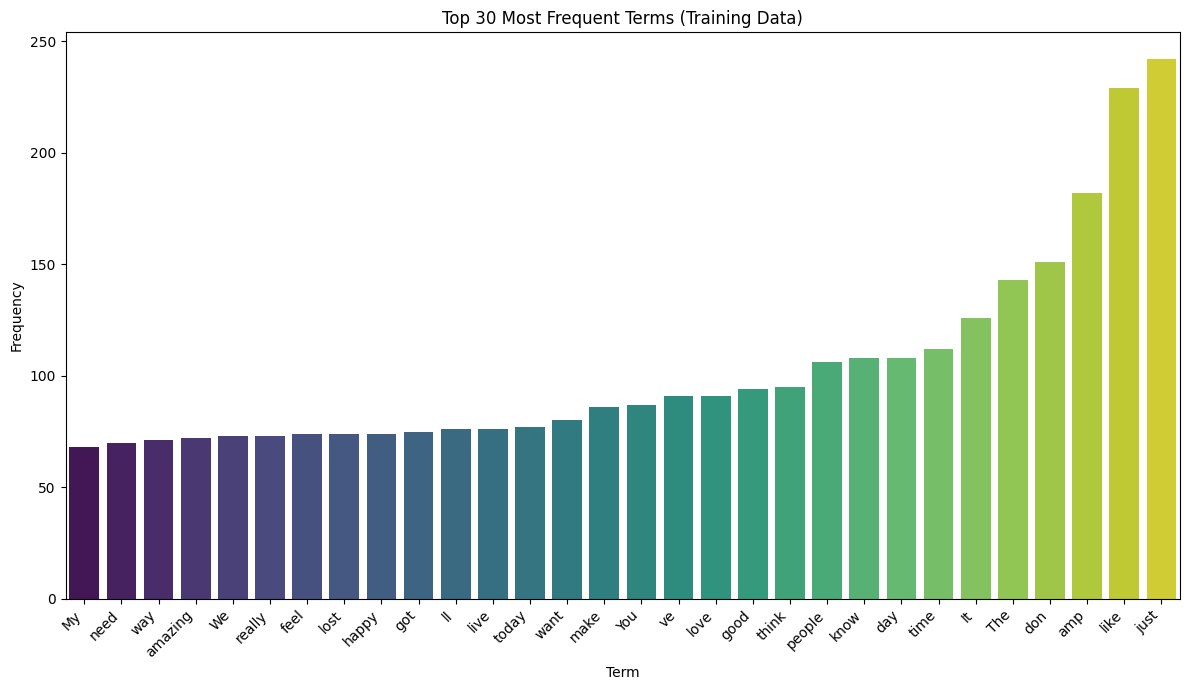

In [117]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cv = CountVectorizer(stop_words='english', lowercase=False)

# Transform training data text into a document-term matrix
train_matrix = cv.fit_transform(train_df["text"])

# View non-zero features (positions and values) for the first sample
print(train_matrix[0].nonzero(), train_matrix[0].data)

# Calculate the occurrence count of each term across all documents
term_sum = np.asarray(train_matrix.sum(axis=0)).ravel()

# Select the top 30 most frequent terms
top_k = 30
top_idx = np.argpartition(term_sum, -top_k)[-top_k:]
top_words = np.array(cv.get_feature_names_out())[top_idx]
top_counts = term_sum[top_idx]

# Reorder based on frequency 
sorted_idx = np.argsort(top_counts)
top_words = top_words[sorted_idx]
top_counts = top_counts[sorted_idx]

#  bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=top_words, y=top_counts, palette='viridis') 
plt.xlabel("Term")
plt.ylabel("Frequency")
plt.title(f"Top {top_k} Most Frequent Terms (Training Data)")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), array([ 374,   95,  642, 1262,  708, 1352, 1814,  912, 1437, 1292,  898],
      dtype=int32)) [1 1 1 1 1 1 1 1 1 1 1]


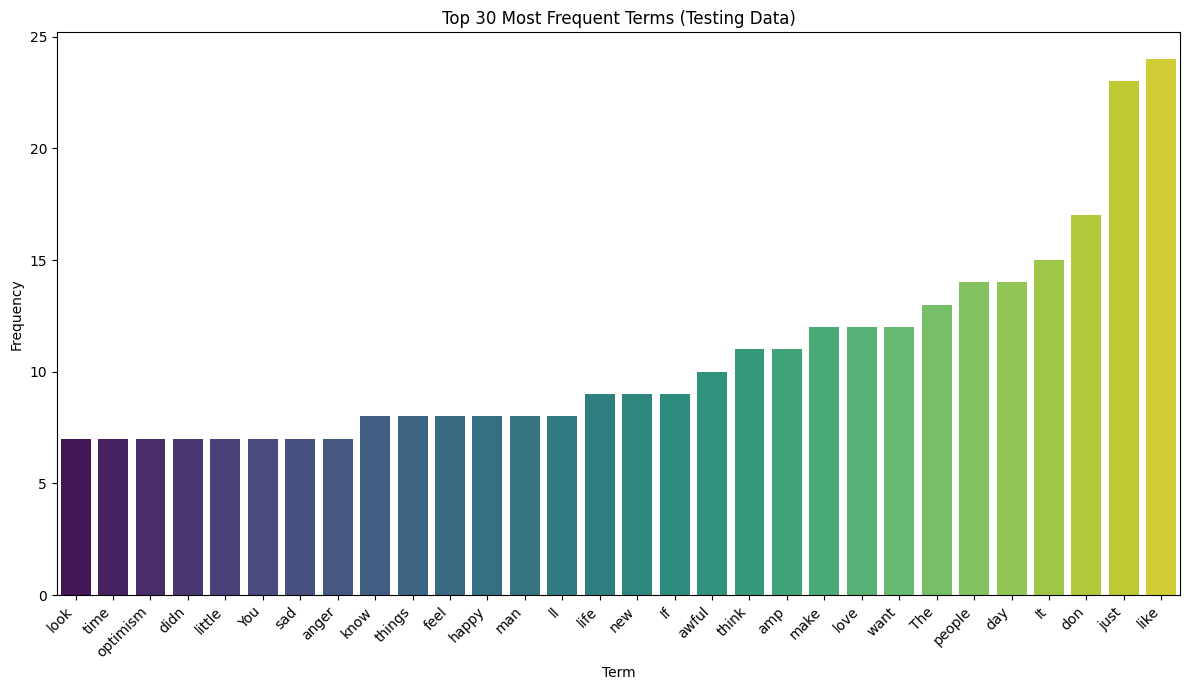

In [118]:
cv = CountVectorizer(stop_words='english', lowercase=False)

# Transform training data text into a document-term matrix
test_matrix = cv.fit_transform(test_df["text"])

# View non-zero features (positions and values) for the first sample
print(test_matrix[0].nonzero(), test_matrix[0].data)

# Calculate the occurrence count of each term across all documents
term_sum = np.asarray(test_matrix.sum(axis=0)).ravel()

# Select the top 30 most frequent terms
top_k = 30
top_idx = np.argpartition(term_sum, -top_k)[-top_k:]
top_words = np.array(cv.get_feature_names_out())[top_idx]
top_counts = term_sum[top_idx]

# Reorder based on frequency 
sorted_idx = np.argsort(top_counts)
top_words = top_words[sorted_idx]
top_counts = top_counts[sorted_idx]

#  bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=top_words, y=top_counts, palette='viridis') 
plt.xlabel("Term")
plt.ylabel("Frequency")
plt.title(f"Top {top_k} Most Frequent Terms (Testing Data)")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [119]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [120]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [121]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

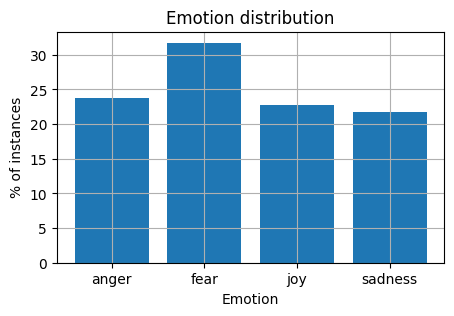

In [122]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [123]:
from sklearn.feature_extraction.text import CountVectorizer

In [124]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [125]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [126]:
# check the result
train_data_BOW_features

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 51467 stored elements and shape (3613, 10115)>

In [127]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [128]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(3613, 10115))

In [129]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [130]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [131]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [132]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [133]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], shape=(3613, 500))

In [134]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheering', 'cheery', 'class',
       'come', 'comes', 'could', 'country'], dtype=object)

In [135]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [136]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
from itertools import islice

# Create TF-IDF vectorizer 
TF_IDF = TfidfVectorizer(
    max_features=1000,
    lowercase=True,
    sublinear_tf=True,   
    smooth_idf=True      
)

# Fit only on the training text
TF_IDF.fit(train_df["text"])

# Transform train / test sets
X_train_TF_IDF = TF_IDF.transform(train_df["text"])
X_test_TF_IDF  = TF_IDF.transform(test_df["text"])

# Get the feature names
feat_names = TF_IDF.get_feature_names_out()

# Display features from index 100 to 109 
start, end = 100, 110
list(islice(feat_names, start, min(end, len(feat_names))))


['bitch',
 'bitter',
 'black',
 'blacks',
 'blame',
 'blessed',
 'blood',
 'bloody',
 'blues',
 'body']

---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [137]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [138]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'anger', 'fear', 'sadness', 'joy', 'fear', 'anger',
       'anger', 'anger', 'sadness'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [139]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.65


In [140]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.65      0.65        84
        fear       0.66      0.68      0.67       110
         joy       0.67      0.67      0.67        79
     sadness       0.62      0.58      0.60        74

    accuracy                           0.65       347
   macro avg       0.65      0.65      0.65       347
weighted avg       0.65      0.65      0.65       347



In [141]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 17  7  5]
 [14 75  9 12]
 [ 8  9 53  9]
 [ 9 12 10 43]]


In [142]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

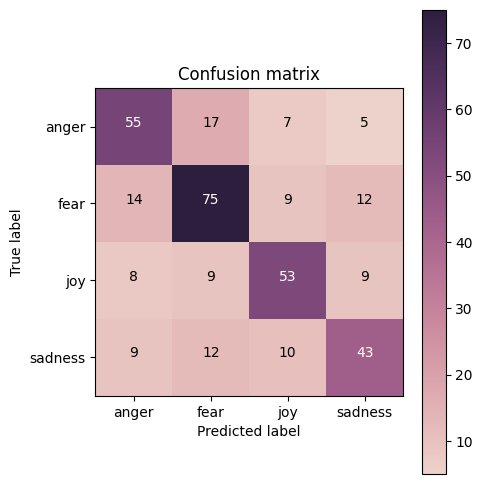

In [143]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [144]:
# Answer here
'''
The large gap between the 99% training accuracy and 68% testing accuracy strongly indicates that the model is overfitting.
This means it learned the training data too well but fails to generalize to new data. 
The confusion matrix shows it struggles to tell similar emotions apart, such as anger and fear. 
This is an expected limitation of using a simple Decision Tree as a baseline.
'''

'\nThe large gap between the 99% training accuracy and 68% testing accuracy strongly indicates that the model is overfitting.\nThis means it learned the training data too well but fails to generalize to new data. \nThe confusion matrix shows it struggles to tell similar emotions apart, such as anger and fear. \nThis is an expected limitation of using a simple Decision Tree as a baseline.\n'

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [145]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Create Bag-of-Words features (assuming 'BOW_500' vectorizer already exists)
# 'BOW_500' is likely a pre-fitted CountVectorizer
X_train = BOW_500.transform(train_df["text"])
y_train = train_df["emotion"]
X_test = BOW_500.transform(test_df["text"])
y_test = test_df["emotion"]

# Initialize and train the Multinomial Naive Bayes classifier
# alpha=0.5 is a smoothing parameter (Laplace smoothing) to handle unseen words
nb_model = MultinomialNB(alpha=0.5) 
nb_model.fit(X_train, y_train)

# Predict results for both training and testing sets
pred_train = nb_model.predict(X_train)
pred_test = nb_model.predict(X_test)

# Calculate the accuracy
train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)

# Print the accuracies, formatted to 2 decimal places
print(f"Train Accuracy : {train_acc:.2f}")
print(f"Test  Accuracy : {test_acc:.2f}")

Train Accuracy : 0.79
Test  Accuracy : 0.70


In [146]:
labels = sorted(y_test.unique())  
report = classification_report(
    y_test, 
    pred_test, 
    target_names=labels, 
    digits=3
)
print(report)

              precision    recall  f1-score   support

       anger      0.659     0.667     0.663        84
        fear      0.737     0.764     0.750       110
         joy      0.767     0.709     0.737        79
     sadness      0.627     0.635     0.631        74

    accuracy                          0.700       347
   macro avg      0.697     0.694     0.695       347
weighted avg      0.701     0.700     0.700       347



Confusion Matrix:
 [[56 13  6  9]
 [ 8 84  5 13]
 [10  7 56  6]
 [11 10  6 47]]


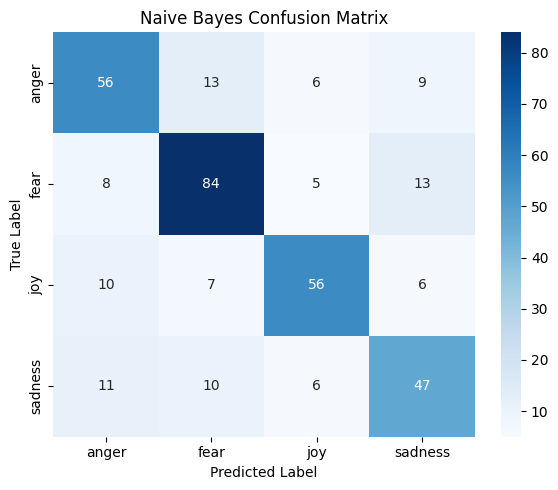

In [147]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# computr sonfusion matrix
cmatrix = confusion_matrix(y_test, pred_test, labels=sorted(y_test.unique()))

print("Confusion Matrix:\n", cmatrix)

# visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cmatrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Naive Bayes Confusion Matrix")
plt.tight_layout()
plt.show()

---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [148]:
# Answer here
'''
The Naive Bayes model performs better on the test set, while the Decision Tree shows overfitting — very high training accuracy but lower testing accuracy. 
This reflects the bias–variance trade-off. 
Decision Trees have low bias but high variance, meaning they easily memorize training data and fail to generalize. 
In contrast, Naive Bayes has high bias but low variance due to its independence assumption, which helps it generalize better on sparse text data.
'''

'\nThe Naive Bayes model performs better on the test set, while the Decision Tree shows overfitting — very high training accuracy but lower testing accuracy. \nThis reflects the bias–variance trade-off. \nDecision Trees have low bias but high variance, meaning they easily memorize training data and fail to generalize. \nIn contrast, Naive Bayes has high bias but low variance due to its independence assumption, which helps it generalize better on sparse text data.\n'

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

Download keras

In [149]:
import sys
!{sys.executable} -m pip install keras tensorflow



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [150]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [151]:
import keras

In [152]:
BOW_500.transform(test_df['text'])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4095 stored elements and shape (347, 500)>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [153]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1317       fear
2599        joy
1917       fear
3606    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [154]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [155]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [156]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [157]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3570 - loss: 1.3261 - val_accuracy: 0.4265 - val_loss: 1.2760
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6416 - loss: 0.9837 - val_accuracy: 0.6398 - val_loss: 0.9635
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8029 - loss: 0.5768 - val_accuracy: 0.7003 - val_loss: 0.7935
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8489 - loss: 0.4092 - val_accuracy: 0.7061 - val_loss: 0.7965
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8818 - loss: 0.3275 - val_accuracy: 0.7061 - val_loss: 0.8316
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9125 - loss: 0.2662 - val_accuracy: 0.6888 - val_loss: 0.8825
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9316 - loss: 0.2169 - val_accuracy: 0.7032 - val_loss: 0.9111
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9424 - loss: 0.1883 - val_accuracy: 0.

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [158]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step 


array([[4.8412133e-02, 5.5359977e-01, 2.6066113e-01, 1.3732700e-01],
       [9.9999988e-01, 1.1804150e-09, 2.6920071e-09, 1.3499145e-07],
       [2.9639818e-04, 9.7635925e-01, 1.9658410e-05, 2.3324734e-02],
       [2.8456626e-02, 6.9864535e-07, 5.8022479e-04, 9.7096246e-01],
       [4.2321863e-05, 9.2943370e-02, 1.7052254e-03, 9.0530902e-01]],
      dtype=float32)

In [159]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'anger', 'fear', 'sadness', 'sadness'], dtype=object)

In [160]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [161]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.357044,1.326113,0.426513,1.275952
1,1,0.641572,0.983741,0.639769,0.963520
2,2,0.802934,0.576809,0.700288,0.793473
3,3,0.848879,0.409206,0.706052,0.796507
4,4,0.881816,0.327478,0.706052,0.831582
5,5,0.912538,0.266170,0.688761,0.882462
6,6,0.931636,0.216852,0.703170,0.911069
7,7,0.942430,0.188265,0.682997,0.995262
8,8,0.956546,0.155254,0.685879,1.045007
9,9,0.961528,0.137857,0.685879,1.124787


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


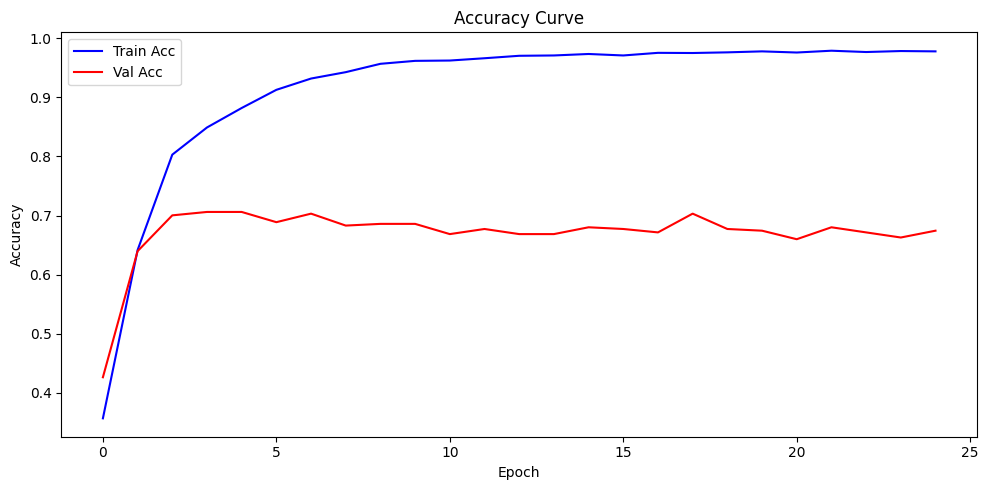

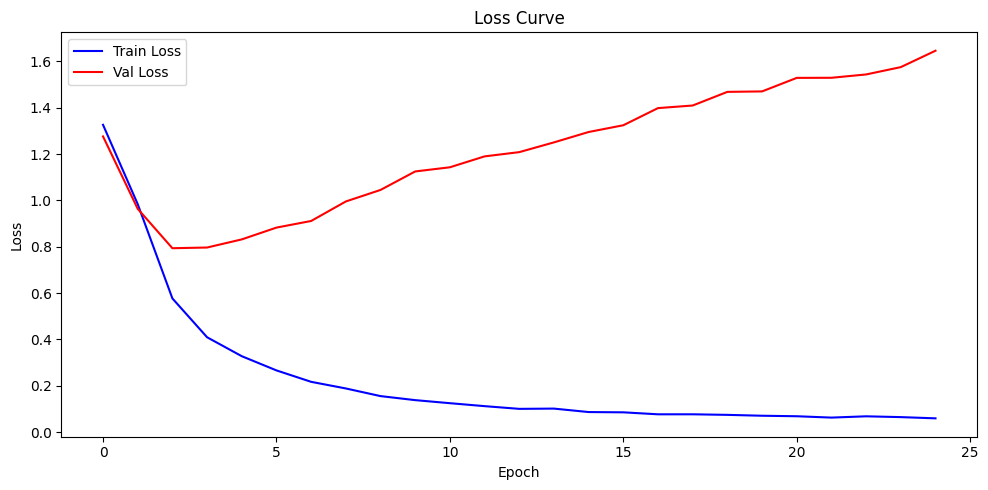

In [162]:
# Answer here
import matplotlib.pyplot as plt

epochs = training_log["epoch"]

# Accuracy 曲線
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_log["accuracy"], "b-", label="Train Acc")
plt.plot(epochs, training_log["val_accuracy"], "r-", label="Val Acc")
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

# Loss 曲線
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_log["loss"], "b-", label="Train Loss")
plt.plot(epochs, training_log["val_loss"], "r-", label="Val Loss")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

In [163]:
'''
The model fits the training data too well but fails to generalize, showing clear overfitting—high training accuracy and low validation accuracy with diverging loss curves.
'''

'\nThe model fits the training data too well but fails to generalize, showing clear overfitting—high training accuracy and low validation accuracy with diverging loss curves.\n'

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

Download gensim

In [164]:
import sys
!{sys.executable} -m pip install gensim



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [165]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1317,20460,"@Relaqss I know she did horrible shit, but it ...","[@, Relaqss, I, know, she, did, horrible, shit..."
2599,30595,what happened to breezy,"[what, happened, to, breezy]"
1917,21060,Huns are like a box of coffee revels,"[Huns, are, like, a, box, of, coffee, revels]"
3606,40779,@PottzGaming hmu need players for lans next ye...,"[@, PottzGaming, hmu, need, players, for, lans..."
2297,30293,Do what makes you successful and #happy now an...,"[Do, what, makes, you, successful, and, #, hap..."


In [166]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'Relaqss', 'I', 'know', 'she', 'did', 'horrible', 'shit', ',', 'but', 'it', 'would', "n't", 'make', 'anything', 'better', 'in', 'the', 'end', ',', 'but', 'your', 'choice']),
       list(['what', 'happened', 'to', 'breezy']),
       list(['Huns', 'are', 'like', 'a', 'box', 'of', 'coffee', 'revels'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [167]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [168]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.20504713,  0.45330894, -0.3189704 , -0.2630627 , -0.4345048 ,
       -1.0941601 ,  0.85343736,  1.4744387 , -0.5417835 , -0.68949926,
       -0.3284876 , -0.39164656, -0.7059877 ,  0.09940908, -0.11532571,
       -0.05062757,  0.44234827, -0.8266753 , -0.07376482, -1.6026448 ,
        1.054844  ,  0.6932526 ,  0.60087985,  0.15923145,  0.6296066 ,
       -0.20466745, -0.7683823 ,  0.38561732, -0.4314782 ,  0.3852665 ,
        0.27644587, -0.17973101,  0.5179268 , -0.6111495 , -0.00450459,
        0.89543283,  0.03609819, -0.39037585, -0.8335162 , -0.2441952 ,
        0.04941643, -0.01444039, -0.5223846 ,  0.24254952,  0.5253602 ,
       -0.27225056, -0.6591508 ,  0.4019432 ,  0.19068512,  0.46590695,
        0.2937771 , -0.5453197 , -0.44694853,  0.13219415, -0.6736554 ,
       -0.23351404,  0.11705355, -0.25494415,  0.09124909,  0.16063862,
        0.09128037, -0.1464504 ,  0.4500913 ,  0.512401  , -0.65641886,
        0.8984835 ,  0.36792788,  0.8365474 , -1.0395081 ,  0.93

In [169]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.9369073510169983),
 ('memories😊', 0.9318036437034607),
 ('Be', 0.9272071719169617),
 ('bday', 0.918548583984375),
 ('cats', 0.9113790988922119),
 ('Makes', 0.90731281042099),
 ('plz', 0.9048702120780945),
 ('promise', 0.9044548869132996),
 ('🕋', 0.904204785823822),
 ('smile', 0.9033717513084412)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [170]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "C:\DM2025-Lab2\DM2025-Lab2-Exercise\GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [171]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [172]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [173]:
# Answer here
'''
Each word in a sentence can be represented by its pretrained Word2Vec embedding. To represent a whole sentence, we need to combine these word vectors into a fixed-length vector.
A simple way is to take the average of all word embeddings, while more advanced methods include weighted averaging using TF-IDF or contextual models such as RNNs, LSTMs, or Transformers that process the sequence of embeddings to capture word order and context.
In essence, these word vectors serve as input features, and the resulting sentence representation becomes the input to the model for downstream tasks like classification or regression.
'''

'\nEach word in a sentence can be represented by its pretrained Word2Vec embedding. To represent a whole sentence, we need to combine these word vectors into a fixed-length vector.\nA simple way is to take the average of all word embeddings, while more advanced methods include weighted averaging using TF-IDF or contextual models such as RNNs, LSTMs, or Transformers that process the sequence of embeddings to capture word order and context.\nIn essence, these word vectors serve as input features, and the resulting sentence representation becomes the input to the model for downstream tasks like classification or regression.\n'

---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [174]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [175]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![pic6.png](./pics/pic6.png)

In [176]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [177]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [178]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

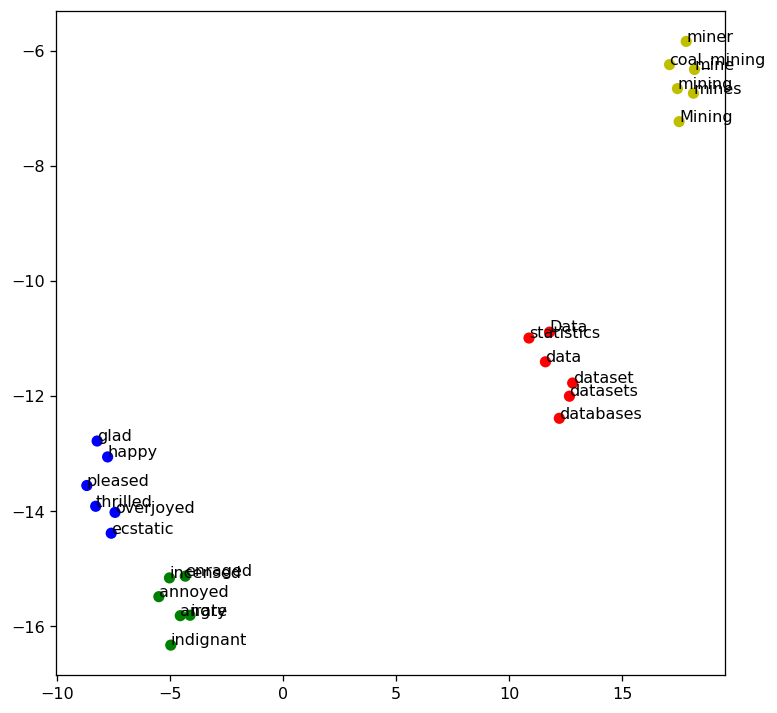

In [179]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

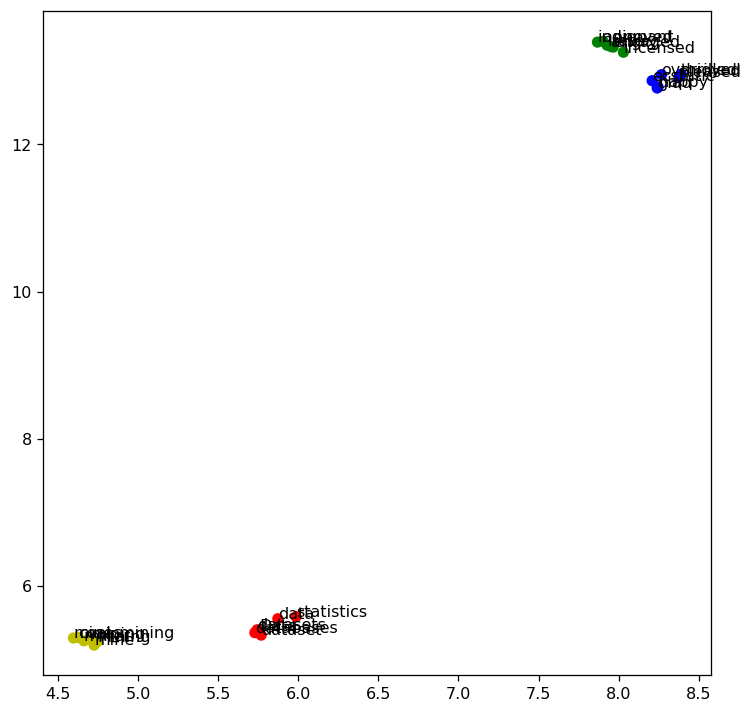

In [180]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

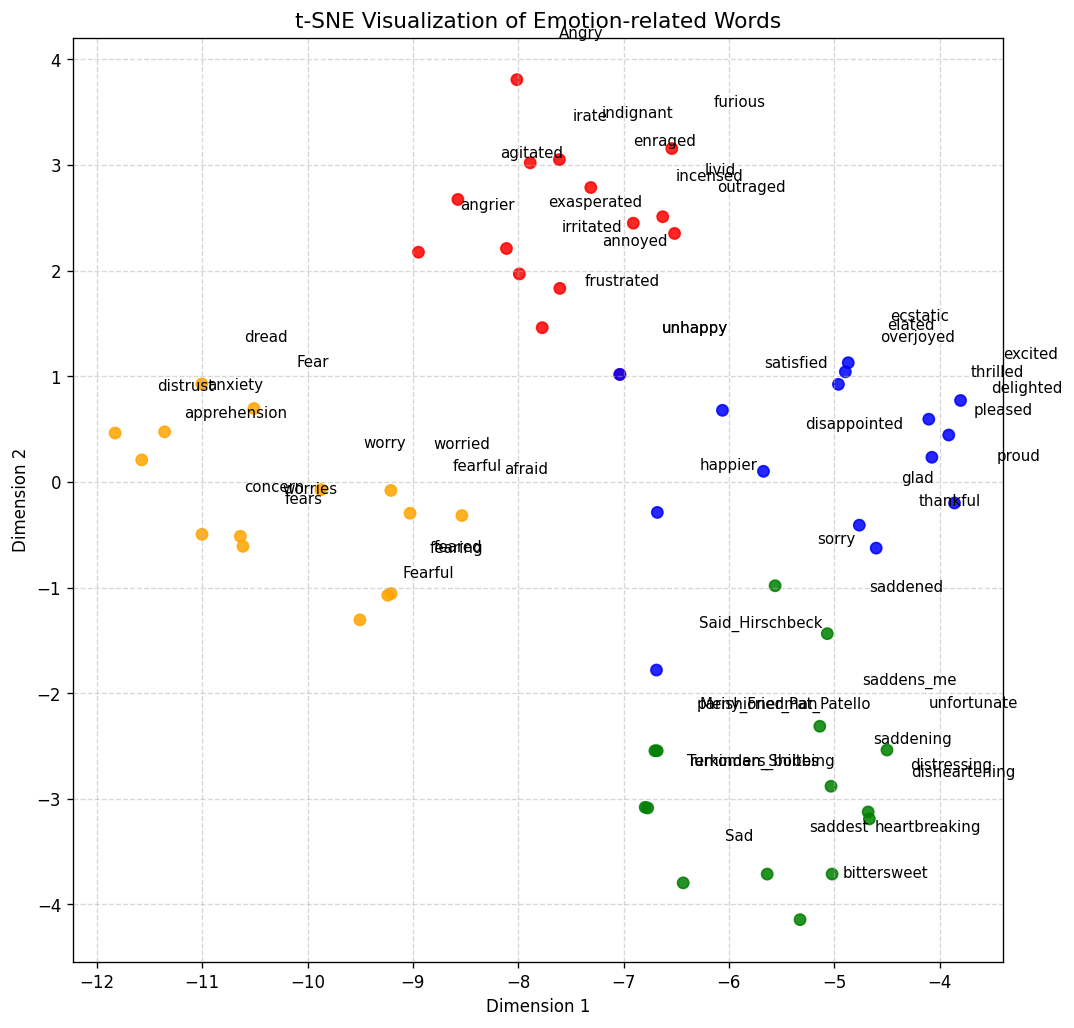

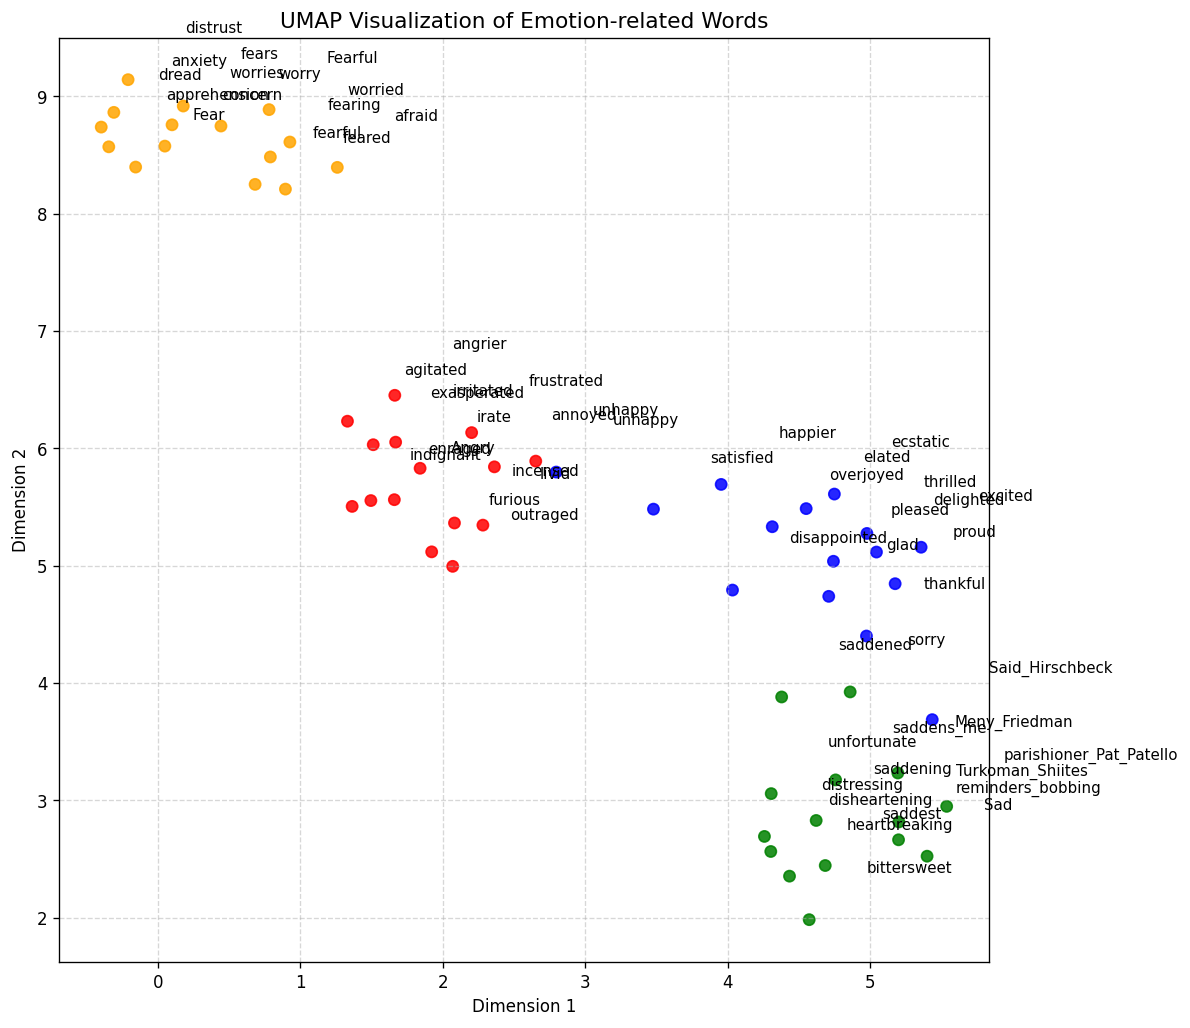

In [181]:
# Answer here
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
import umap.umap_ as umap

# Define base emotions & retrieve 15 similar words each 
base_emotions = ['angry', 'happy', 'sad', 'fear']
num_related = 15  

emotion_groups = {}
for emo in base_emotions:
    similar_terms = [w for w, s in w2v_google_model.most_similar(emo, topn=num_related)]
    emotion_groups[emo] = similar_terms

# Combine & assign colors 
target_words = sum(emotion_groups.values(), [])
colors_map = {'angry': 'red', 'happy': 'blue', 'sad': 'green', 'fear': 'orange'}
color_list = [colors_map[emo] for emo in base_emotions for _ in range(num_related)]

# Get valid word vectors 
valid_words = [w for w in target_words if w in w2v_google_model.key_to_index]
X = np.array([w2v_google_model[w] for w in valid_words], dtype=np.float32)
color_valid = color_list[:len(valid_words)]

# Normalize vectors (for cosine-like distance)
X_norm = X / (np.linalg.norm(X, axis=1, keepdims=True) + 1e-12)

# t-SNE visualization 
tsne = TSNE(
    n_components=2,
    init='pca',
    random_state=28,
    perplexity=30,
    learning_rate='auto'
)
X_tsne = tsne.fit_transform(X_norm)

plt.figure(figsize=(10, 10), dpi=120)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color_valid, s=45, alpha=0.85)
for word, x, y in zip(valid_words, X_tsne[:, 0], X_tsne[:, 1]):
    plt.text(x + 0.4, y + 0.4, word, fontsize=9)
plt.title("t-SNE Visualization of Emotion-related Words", fontsize=13)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# UMAP visualization
umap_model = umap.UMAP(
    n_components=2,
    metric='cosine',
    random_state=28,
    n_neighbors=15,
    min_dist=0.1
)
X_umap = umap_model.fit_transform(X)

plt.figure(figsize=(10, 10), dpi=120)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=color_valid, s=45, alpha=0.85)
for word, x, y in zip(valid_words, X_umap[:, 0], X_umap[:, 1]):
    plt.text(x + 0.4, y + 0.4, word, fontsize=9)
plt.title("UMAP Visualization of Emotion-related Words", fontsize=13)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

---